[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


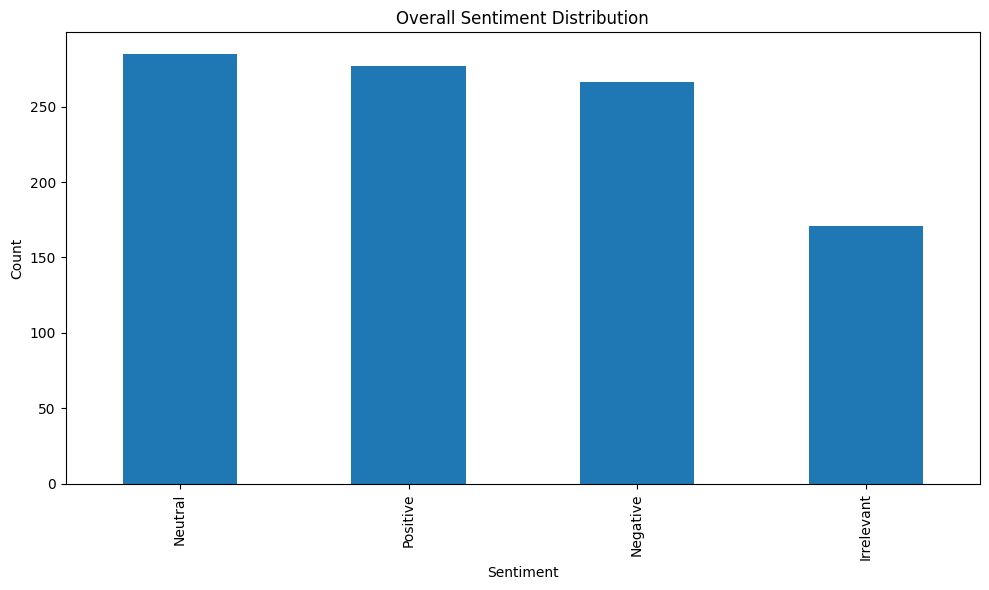

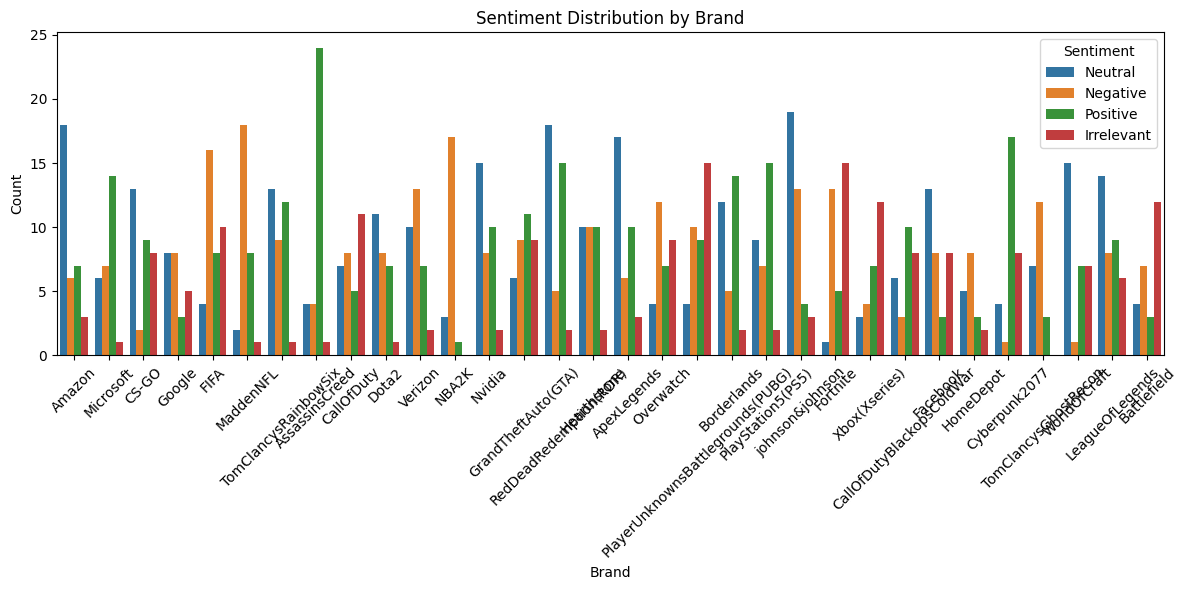

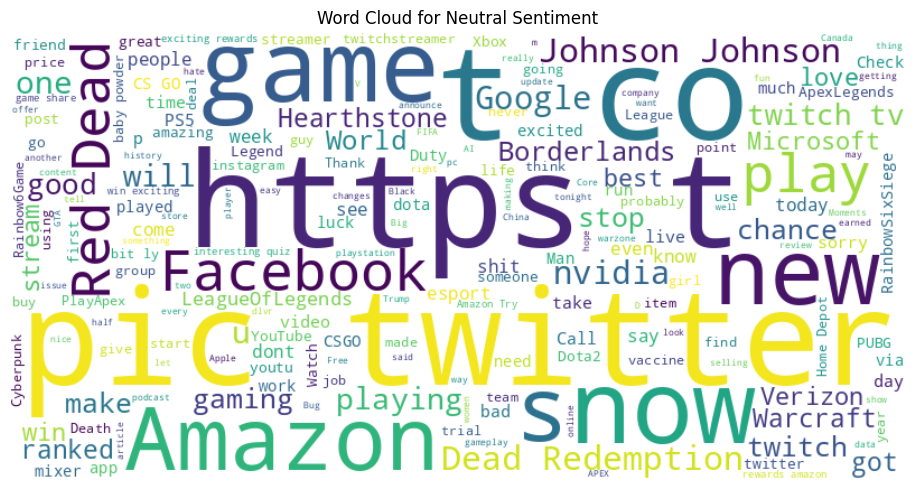

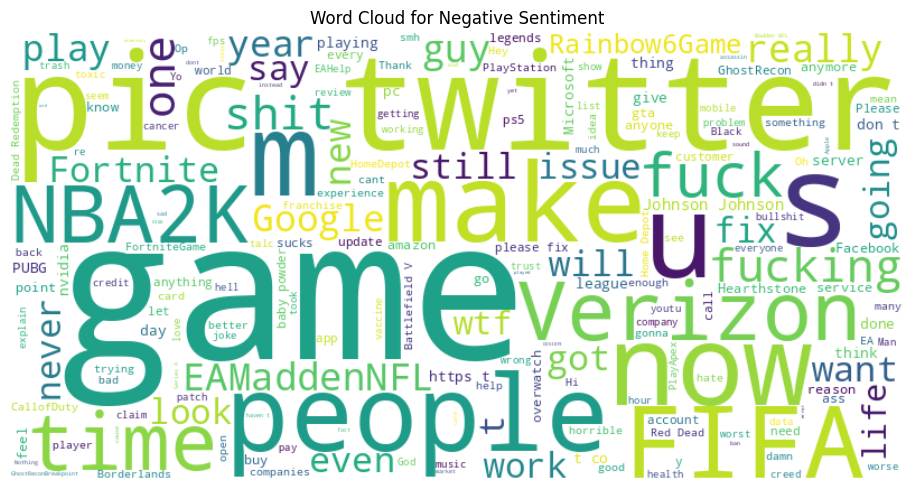

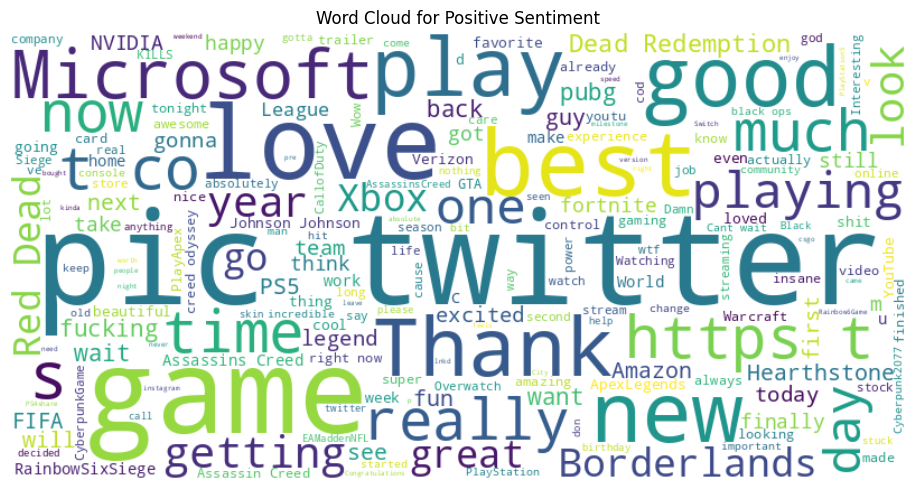

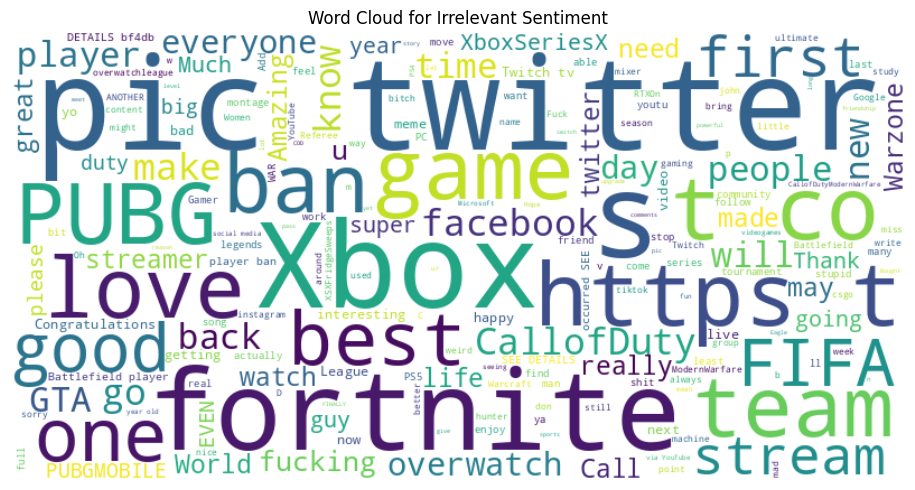

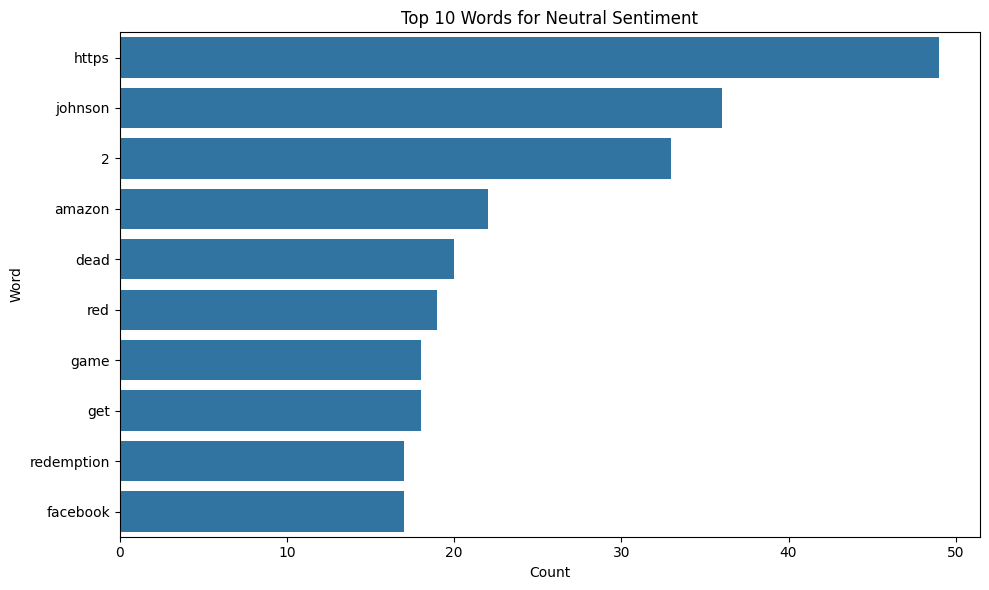

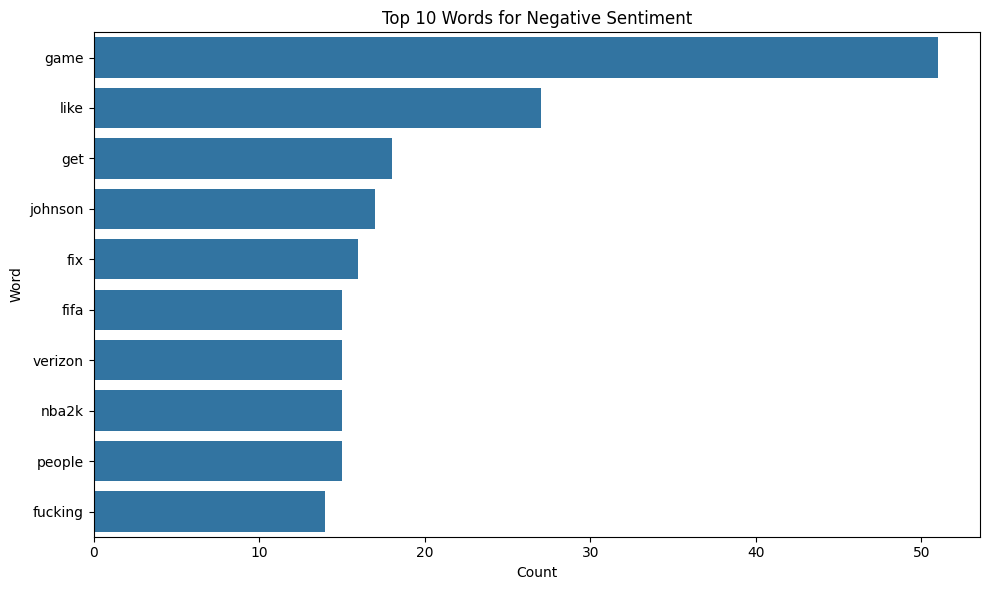

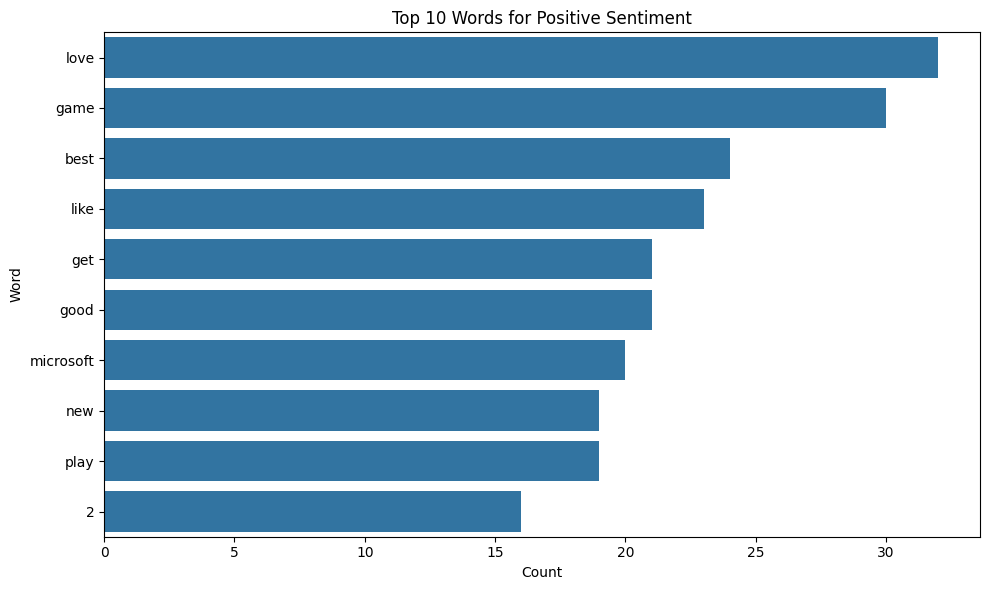

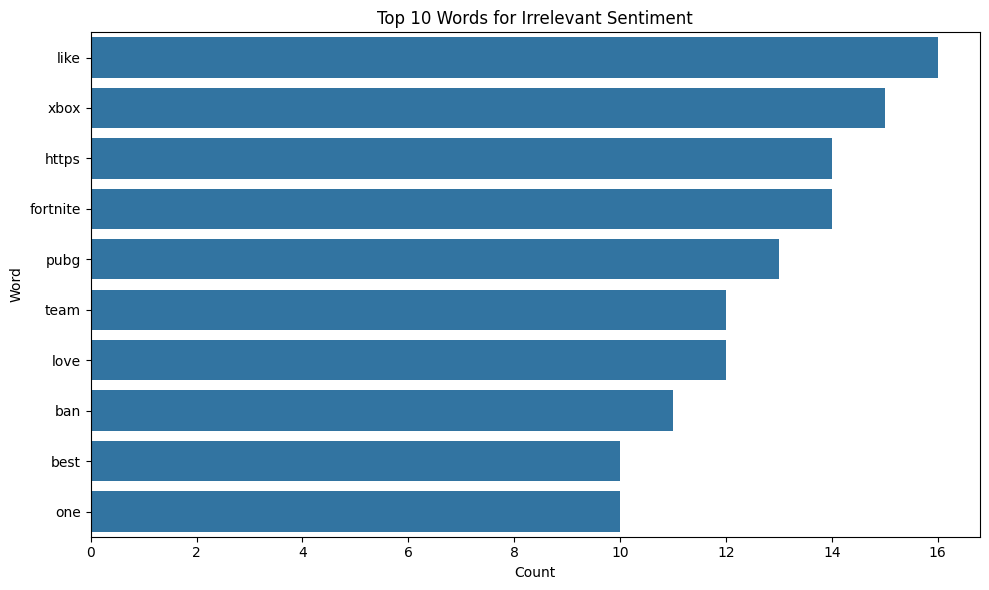

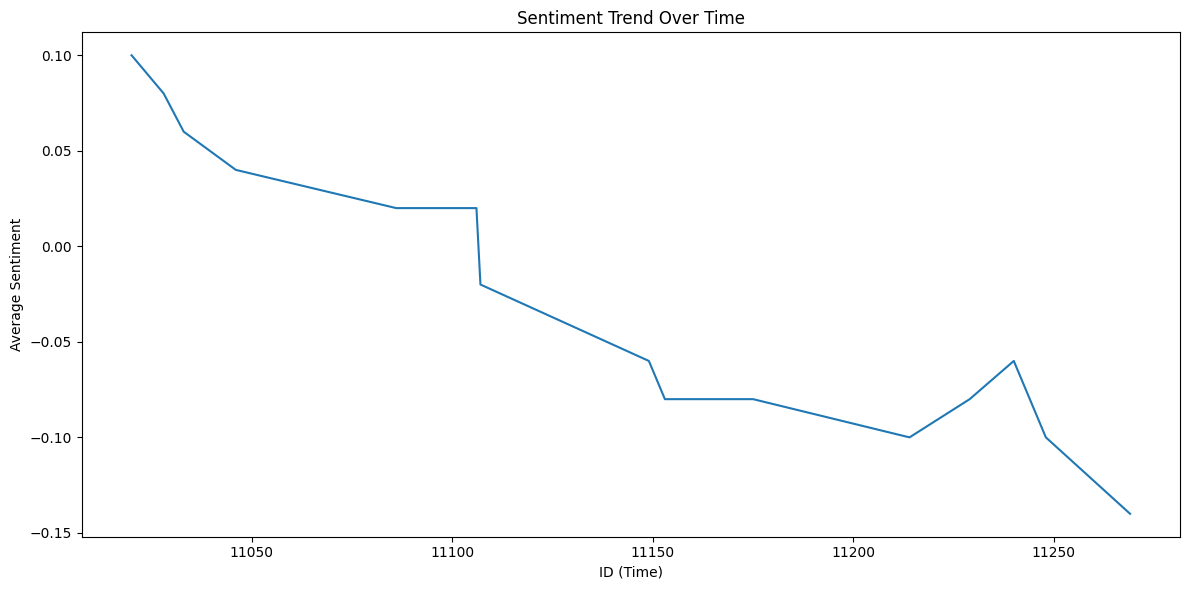

<Figure size 1200x600 with 0 Axes>

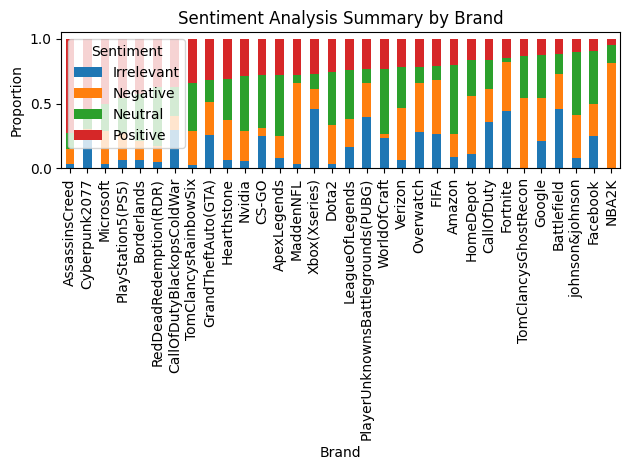

Analysis complete. Please check the visualizations for insights.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load the data
df = pd.read_csv('/content/twitter_validation.csv')  # Replace with your actual file name

# Rename columns for clarity
df.columns = ['ID', 'Brand', 'Sentiment', 'Text']

# 1. Overall sentiment distribution
plt.figure(figsize=(10, 6))
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Sentiment distribution by brand
plt.figure(figsize=(12, 6))
sns.countplot(x='Brand', hue='Sentiment', data=df)
plt.title('Sentiment Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# 3. Word cloud for each sentiment
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()

for sentiment in df['Sentiment'].unique():
    text = ' '.join(df[df['Sentiment'] == sentiment]['Text'])
    create_wordcloud(text, f'Word Cloud for {sentiment} Sentiment')

# 4. Most common words for each sentiment
def get_top_words(text, n=10):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalnum()]
    words = [word for word in words if word not in stopwords.words('english')]
    return Counter(words).most_common(n)

for sentiment in df['Sentiment'].unique():
    text = ' '.join(df[df['Sentiment'] == sentiment]['Text'])
    top_words = get_top_words(text)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=[word[1] for word in top_words], y=[word[0] for word in top_words])
    plt.title(f'Top 10 Words for {sentiment} Sentiment')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show()

# 5. Sentiment trend over time (assuming ID represents some form of time order)
df['ID'] = pd.to_numeric(df['ID'])
df = df.sort_values('ID')
df['Sentiment_numeric'] = df['Sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

plt.figure(figsize=(12, 6))
plt.plot(df['ID'], df['Sentiment_numeric'].rolling(window=50).mean())
plt.title('Sentiment Trend Over Time')
plt.xlabel('ID (Time)')
plt.ylabel('Average Sentiment')
plt.tight_layout()
plt.show()

# 6. Sentiment analysis summary
sentiment_summary = df.groupby('Brand')['Sentiment'].value_counts(normalize=True).unstack()
sentiment_summary = sentiment_summary.sort_values('Positive', ascending=False)

plt.figure(figsize=(12, 6))
sentiment_summary.plot(kind='bar', stacked=True)
plt.title('Sentiment Analysis Summary by Brand')
plt.xlabel('Brand')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

print("Analysis complete. Please check the visualizations for insights.")